<a href="https://colab.research.google.com/github/borrowedbirch05/Fast.AI/blob/main/MNIST_FULL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#MNIST Full Example
*italicized text*

In [2]:
#hide
! [ -e /content ] && pip install -Uqq fastbook
import fastbook
fastbook.setup_book()

Mounted at /content/gdrive


In [3]:
from fastbook import *

In [29]:
from fastai.vision.all import *
path = untar_data(URLs.MNIST)

In [30]:
Path.BASE_PATH = path

In [31]:
path.ls()

(#2) [Path('testing'),Path('training')]

In [47]:
(path/'training').ls()

(#10) [Path('training/3'),Path('training/0'),Path('training/6'),Path('training/9'),Path('training/5'),Path('training/1'),Path('training/7'),Path('training/2'),Path('training/8'),Path('training/4')]

In [68]:
import re
def extract_class_name(idx):
  # print(str(idx))
  try:
    found = re.search('training/(.+?)/.*', str(idx)).group(1)
    return found
  except:
    print("exception")

In [71]:
imgs = DataBlock(blocks = (ImageBlock, CategoryBlock),
                 get_items=get_image_files,
                 splitter=RandomSplitter(seed=42),
                 get_y=extract_class_name,
                 item_tfms=Resize(460))
                #  batch_tfms=aug_transforms(size=224, min_scale=0.75))
dls = imgs.dataloaders(path/"training")

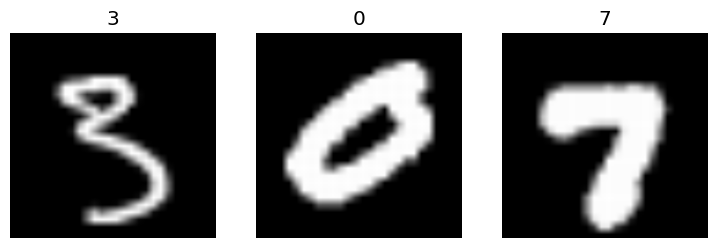

In [72]:
dls.show_batch(nrows=1, ncols=3)